In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
PATH_DATA = Path("./dataset")
PATH_FIGURES = Path("./figures/faithful")
PATH_FIGURES.mkdir(parents=True, exist_ok=True)

def savefig(fname): plt.savefig(PATH_FIGURES.joinpath(fname), dpi=300)

In [2]:
df_base = pd.read_csv(PATH_DATA.joinpath("faithful.xls"), index_col=0)
df_base.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [67]:
def preprocess(df):
    # 数据归一化
    def normalize(x):
        return (x - np.mean(x)) / np.std(x)
    ret = df.apply(normalize, axis=0)
    return ret
df = preprocess(df_base)
df.describe()

,eruptions,waiting
count,2.720000e+02,2.720000e+02
mean,4.653141e-16,4.342931e-16
std,1.001843e+00,1.001843e+00
min,-1.657009e+00,-2.055795e+00
25%,-1.163053e+00,-9.504124e-01
50%,4.496005e-01,3.760469e-01
75%,8.483203e-01,8.182000e-01
max,1.415130e+00,1.849891e+00


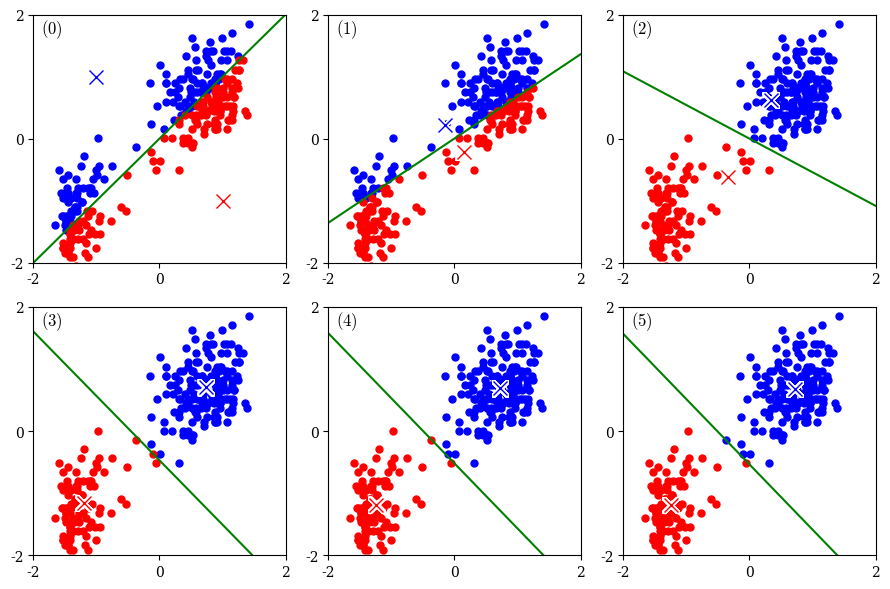

In [64]:
plt.rcParams['font.family'] = ['serif']
x = df.to_numpy()
fig, axs = plt.subplots(2,3,figsize=(9,6))
def plot_union(union, mu, ax:plt.Axes, color=''):
    ax.plot(union[:,0], union[:,1], '.'+color, markersize=10)
    x, y = np.meshgrid(np.linspace(-0.02,0.02,10), np.linspace(-0.02,0.02,10))
    ax.plot(mu[0]+x, mu[1]+y, 'xw', markersize=10)
    ax.plot(mu[0], mu[1], 'x'+color, markersize=10)
    ax.set_xticks([-2, 0, 2])
    ax.set_yticks([-2, 0, 2])
    ax.axis([-2, 2, -2, 2])
def plt_midline(cnt, mu, ax):
    ax.text(-1.7, 1.7, f"$({cnt})$", fontsize=12, ha='center', color='k', math_fontfamily='cm')
    a = (mu[0] + mu[1]) / 2
    b = mu[0] - mu[1]; b[0],b[1] = b[1],-b[0]
    x = np.array([a + (-2-a[0])/b[0] * b, a + (2-a[0])/b[0] * b])
    ax.plot(x[:,0], x[:,1], '-g')
def getdis(x, mu):
    dis = []
    for i in range(mu.shape[0]):
        dis.append(np.sqrt(np.sum(np.power(x-mu[i], 2))))
    return dis
mu = np.array([[-1, 1], [1, -1]])
for cnt, ax in enumerate(axs.reshape(-1)):
    dis = np.array([getdis(x[i], mu) for i in range(x.shape[0])])
    r = np.argmin(dis, axis=1)
    plot_union(x[r==0], mu[0], ax, 'b')
    plot_union(x[r==1], mu[1], ax, 'r')
    plt_midline(cnt, mu, ax)
    mu = np.array([np.mean(x[r==i], axis=0) for i in range(mu.shape[0])])
fig.tight_layout()
savefig("Kmeans"); plt.show()